In [1]:
import pandas as pd

# Import data from XLSX file (replace with your file path)
data = pd.read_excel("r1_r2_annotations_liwc_h.xlsx")

# Select numerical features (adjust if needed)
numerical_features = data.select_dtypes(include=["int64", "float64"])

# Calculate correlation matrix
correlations = numerical_features.corr(method='spearman')

# Filter strong correlations (above 0.5 or below -0.5)
strong_corr = correlations.unstack().sort_values(kind='quicksort', ascending=False)

# Avoid duplicates by removing correlations with themselves and lexicographically ordering correlation pairs
strong_corr = strong_corr[strong_corr != 1]
strong_corr = strong_corr[
    strong_corr.index.get_level_values(0) < strong_corr.index.get_level_values(1)
]

# Filter for strong correlations
strong_positive_corr = strong_corr[strong_corr > 0.5]
strong_negative_corr = strong_corr[strong_corr < -0.5].sort_values(ascending=True)

# Display top 5 positive and negative correlations
print('Top 5 Positive Correlations:')
print(strong_positive_corr.head(5))
print('\nTop 5 Negative Correlations:')
print(strong_negative_corr.head(5))

Top 5 Positive Correlations:
Cognition     cogproc     0.931049
Conversation  netspeak    0.909459
Physical      health      0.892339
emo_neg       emotion     0.887259
Linguistic    function    0.855305
dtype: float64

Top 5 Negative Correlations:
Tone        tone_neg   -0.739639
            emo_neg    -0.660232
Analytic    pronoun    -0.654543
Linguistic  OtherP     -0.645427
OtherP      function   -0.627623
dtype: float64


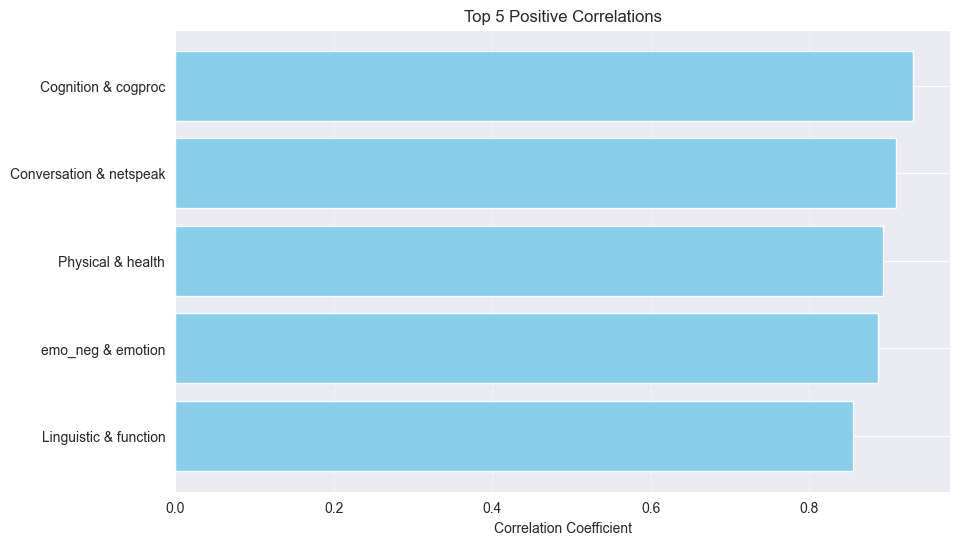

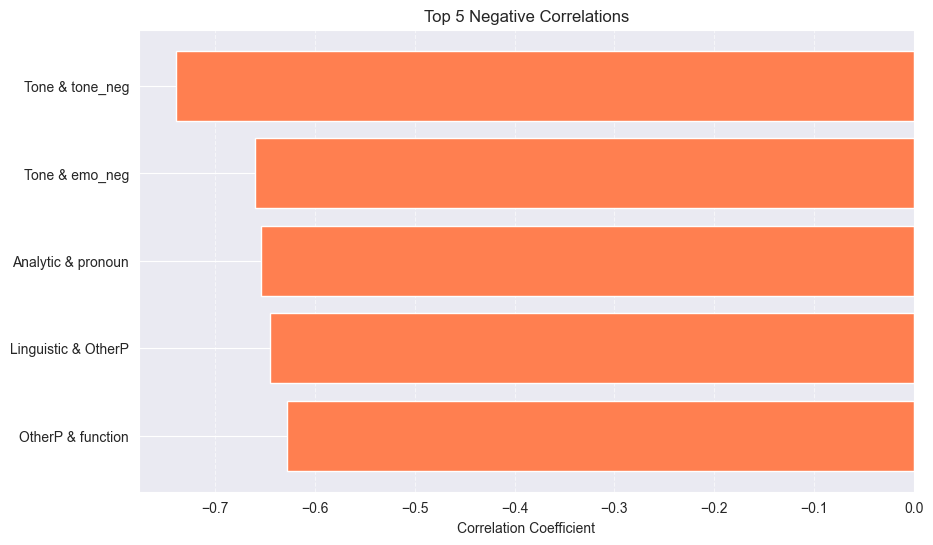

In [2]:
import matplotlib.pyplot as plt

# Convert tuple index to string
pos_index = [' & '.join(map(str, ind)) for ind in strong_positive_corr.index[:5]]
neg_index = [' & '.join(map(str, ind)) for ind in strong_negative_corr.index[:5]]

# Visualization for top 5 positive correlations
plt.figure(figsize=(10, 6))
plt.barh(pos_index, strong_positive_corr.values[:5], color='skyblue')
plt.xlabel('Correlation Coefficient')
plt.title('Top 5 Positive Correlations')
plt.gca().invert_yaxis()  # Invert y-axis to display strongest correlation at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

# Visualization for top 5 negative correlations
plt.figure(figsize=(10, 6))
plt.barh(neg_index, strong_negative_corr.values[:5], color='coral')
plt.xlabel('Correlation Coefficient')
plt.title('Top 5 Negative Correlations')
plt.gca().invert_yaxis()  # Invert y-axis to display strongest correlation at the top
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

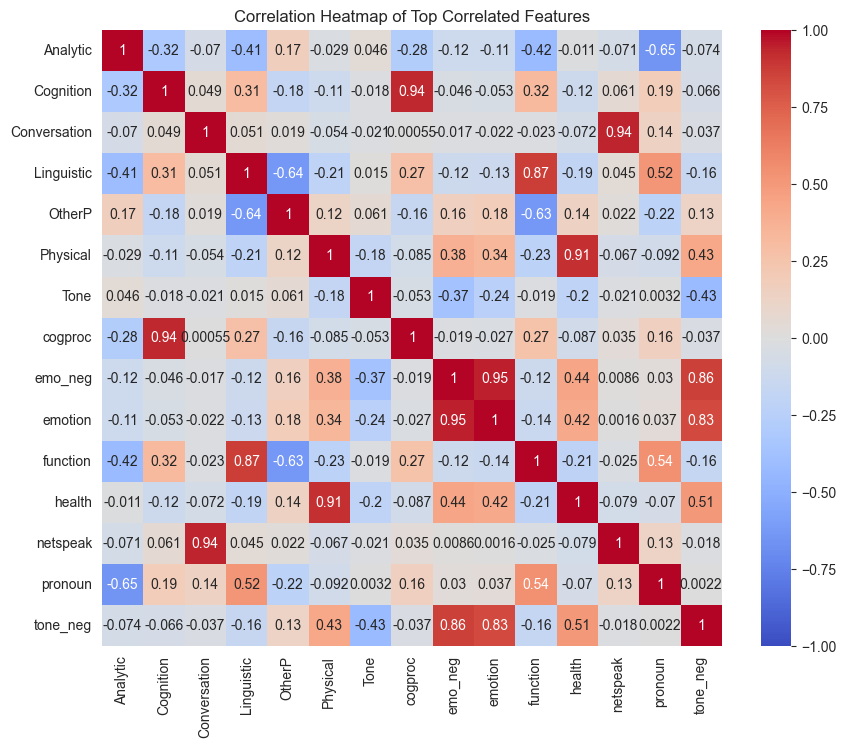

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Get unique pairs from index for positive and negative correlations
pairs_pos = [pair for pair in strong_positive_corr.index[:5]]
pairs_neg = [pair for pair in strong_negative_corr.index[:5]]
pairs = pairs_pos + pairs_neg

# Get unique features from all pairs
features = list(np.unique([feature for pair in pairs for feature in pair]))

# Create sub-matrix with only these unique features
sub_matrix = numerical_features[features].corr()

# Plotting correlation heatmap for top feature pairs
plt.figure(figsize=(10, 8))
sns.heatmap(sub_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlation Heatmap of Top Correlated Features')
plt.show()

## Analysis of NoMajority labeled tweets

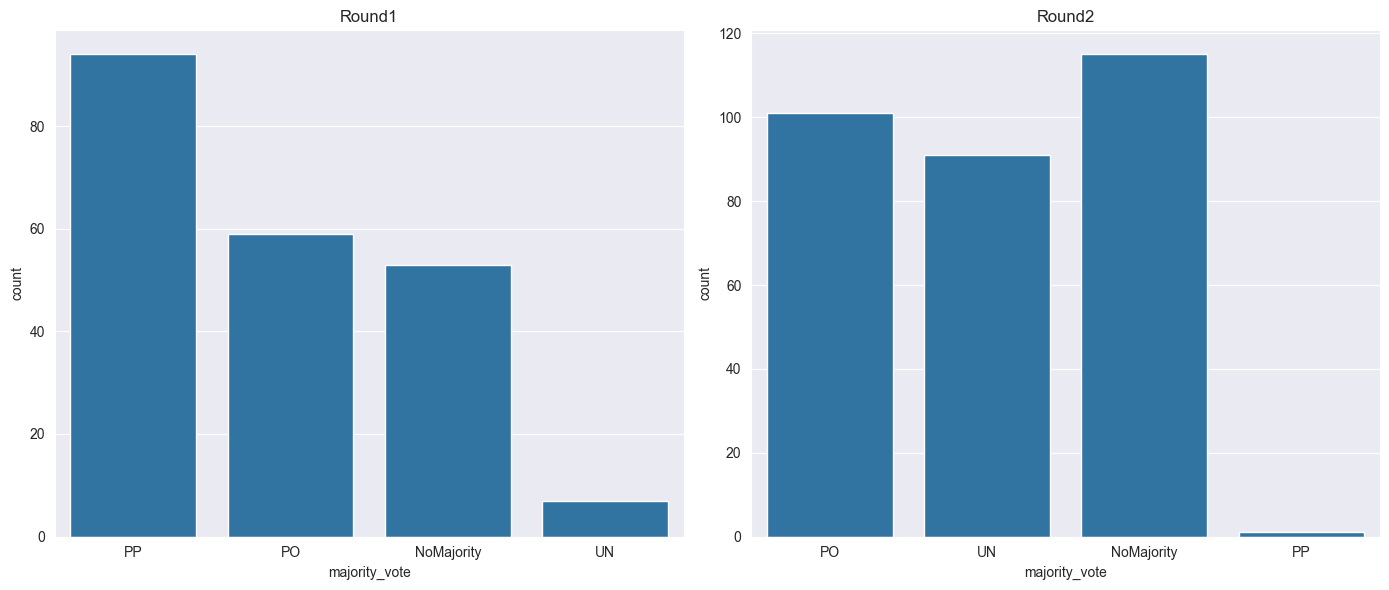

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_excel("r1_r2_annotations_liwc_h.xlsx")
# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(14, 6))

# Plot the data for 'Round1'
sns.countplot(ax=axes[0], x=df[df['roundID'] == 'Round1']['majority_vote'])
axes[0].title.set_text('Round1')

# Plot the data for 'Round2'
sns.countplot(ax=axes[1], x=df[df['roundID'] == 'Round2']['majority_vote'])
axes[1].title.set_text('Round2')

# Display the plots
plt.tight_layout()
plt.show()

<Axes: ylabel='count'>

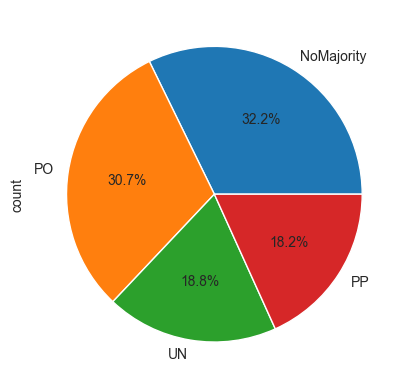

In [5]:
df['majority_vote'].value_counts().plot(kind='pie', autopct="%.1f%%")

## How consistent were the annotators between two rounds?

   roundID annotator  agreement_with_majority
2   Round1        A3                 0.685446
4   Round1        A5                 0.685446
0   Round1        A1                 0.629108
3   Round1        A4                 0.615023
5   Round1        A6                 0.572770
1   Round1        A2                 0.441315
6   Round2        A1                 0.594156
9   Round2        A4                 0.590909
8   Round2        A3                 0.545455
10  Round2        A5                 0.474026
11  Round2        A6                 0.412338
7   Round2        A2                 0.399351


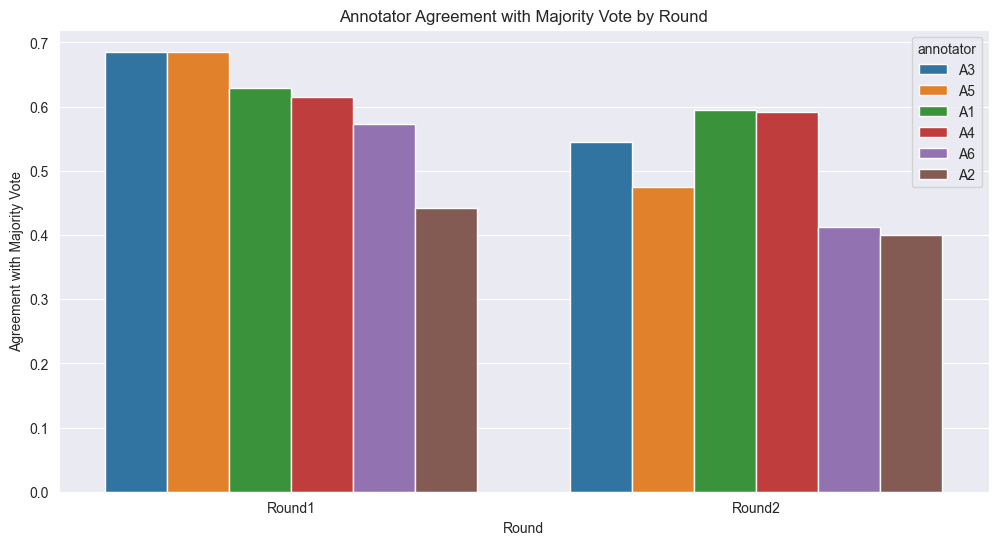

In [8]:
import pandas as pd

# I'm assuming 'df' is your DataFrame
rounds = df['roundID'].unique()
annotators = ['A1', 'A2', 'A3', 'A4', 'A5', 'A6']

agreement_data = []

for round in rounds:
    df_round = df[df['roundID'] == round]
    for annotator in annotators:
        agreement = (df_round[annotator] == df_round['majority_vote']).mean()
        agreement_data.append({
            'roundID': round,
            'annotator': annotator,
            'agreement_with_majority': agreement,
        })

agreement_df = pd.DataFrame(agreement_data)

# Sorting in descending order for each round
agreement_df.sort_values(by=['roundID', 'agreement_with_majority'], ascending=[True, False], inplace=True)

print(agreement_df)


# Plotting the data
plt.figure(figsize=(12, 6))
sns.barplot(data=agreement_df, x='roundID', y='agreement_with_majority', hue='annotator')
plt.title('Annotator Agreement with Majority Vote by Round')
plt.ylabel('Agreement with Majority Vote')
plt.xlabel('Round')
plt.show()

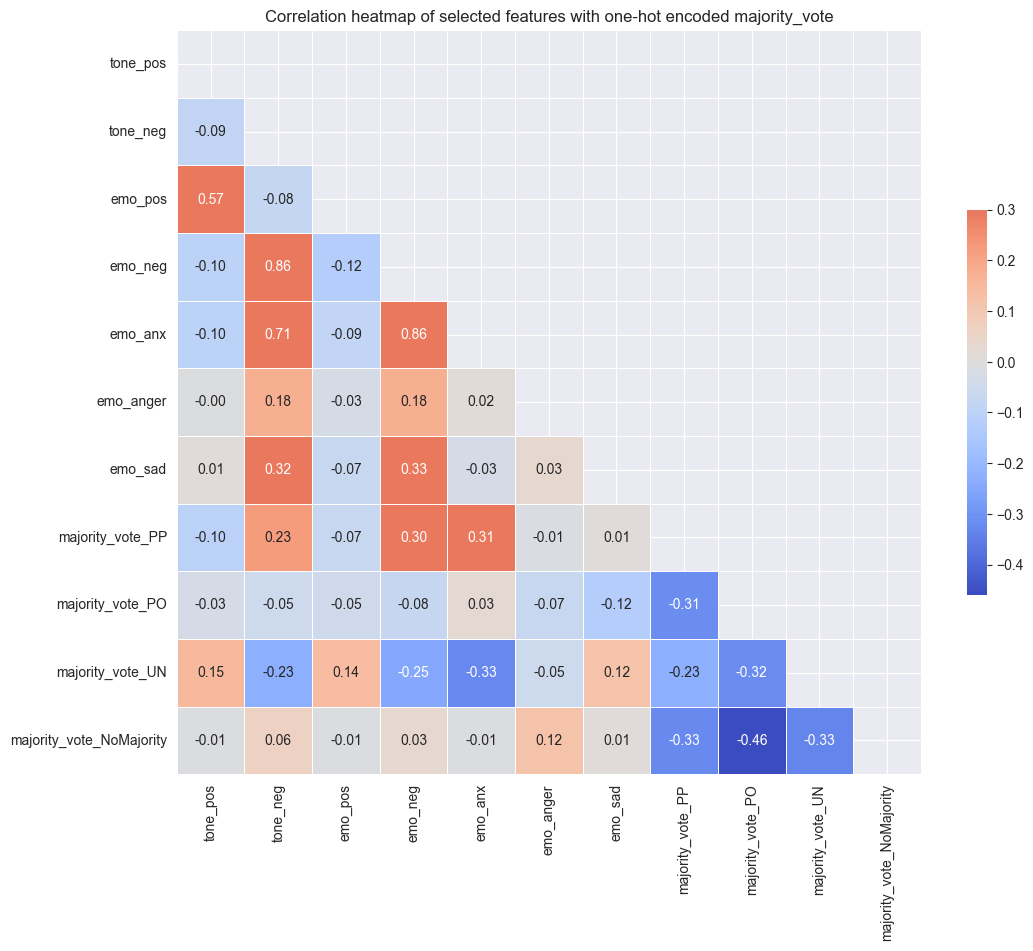

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Perform one-hot encoding on 'majority_vote'
df_encoded = pd.get_dummies(df, columns=['majority_vote'])

# Select relevant columns
columns = ['tone_pos', 'tone_neg', 'emo_pos', 'emo_neg', 'emo_anx', 'emo_anger', 'emo_sad', 
           'majority_vote_PP', 'majority_vote_PO', 'majority_vote_UN', 'majority_vote_NoMajority']
df_selected = df_encoded[columns]

# Calculate the correlation matrix
corr = df_selected.corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Draw the heatmap with the mask, annot=true, and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap="coolwarm", vmax=.3, center=0,
            square=True, linewidths=.5, annot=True, fmt=".2f", 
            cbar_kws={"shrink": .5})

plt.title('Correlation heatmap of selected features with one-hot encoded majority_vote')
plt.show()

# PCA and Univariate

In [10]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, LabelEncoder
import pandas as pd
from sklearn.impute import SimpleImputer

# Load the data
df = pd.read_excel("r1_r2_annotations_liwc_h.xlsx")

# Drop the irrelevant columns as per your specifications
df.drop(columns=['text', 'proc_text', 'A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'roundID', 'Segment'], inplace=True)

# Keep the column names to use after imputing
col_names = df.columns

# Prepare imputer
mode_imputer = SimpleImputer(strategy='most_frequent')

# Impute the missing values in all columns (numerical & categorical columns)
df = mode_imputer.fit_transform(df)

# Convert the array back to a DataFrame and add column names
df = pd.DataFrame(df, columns=col_names)

# Assuming all other columns (except 'majority_vote') are numeric, let's scale them
num_cols = df.columns.drop('majority_vote')
scaler = StandardScaler()
df[num_cols] = scaler.fit_transform(df[num_cols])

# Encode the categorical target column
le = LabelEncoder()
df['majority_vote'] = le.fit_transform(df['majority_vote'])

# Apply PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df.drop(columns=['majority_vote']))

# Apply SelectKBest
selector = SelectKBest(score_func=f_classif, k=5)
fit = selector.fit(df.drop(columns=['majority_vote']), df['majority_vote'])

# Get the column names back
feature_scores = pd.concat([pd.DataFrame(df.drop(columns=['majority_vote']).columns), pd.DataFrame(fit.scores_)], axis=1)

feature_scores.columns = ['Feature_Name', 'Score']  # naming the dataframe columns
print(feature_scores.nlargest(5, 'Score'))  # print 5 best features

   Feature_Name      Score
12            i  80.688869
79       mental  44.569757
49      emo_anx  34.333155
2         Clout  26.021665
7           Dic  25.888484
